[View in Colaboratory](https://colab.research.google.com/github/danielcanueto/Adversarial_Autoencoder/blob/master/Adversarial_Autoencoder_2.ipynb)

In [0]:
import os 
import tensorflow as tf
import numpy as np

In [0]:
#I've prepared a fork of the original repository in order to edit the parameters (e.g. from 1000 epochs to 100, as I've seen it is not necessary to have som amny at least during exploratory analysis).
#!git clone https://github.com/danielcanueto/Adversarial_Autoencoder/

In [0]:
#os.chdir('Adversarial_Autoencoder')

In [0]:
#!python3 autoencoder.py --train True
#!python3 adversarial_autoencoder.py --train True
#!python3 supervised_adversarial_autoencoder.py --train True

In [0]:
#!python3 adversarial_autoencoder.py --train False

In [0]:
#To have access to each model saved. A folder for every model, with basic info in folder
#os.listdir('Results/Adversarial_Autoencoder/')

In [0]:
#Log info of training
#data_path = 'Results/Adversarial_Autoencoder/2018-05-13 07:03:34.122351_2_0.001_100_100_0.9_Adversarial_Autoencoder/log/log.txt'
#with open(data_path, 'rb') as f:
#    lines = [x.decode('utf8').strip() for x in f.readlines()]
#lines

#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('./Data', one_hot=True)

#print(mnist.train.images.shape, mnist.train.labels.shape)
#print(mnist.validation.images.shape, mnist.validation.labels.shape)
#print(mnist.test.images.shape, mnist.test.labels.shape)
#mnist.train.next_batch

In [0]:
#os.chdir("..")

In [9]:

#I've prepared a fork of the original repository to handle python 2 -> python 3 changes
!git clone https://github.com/danielcanueto/abide

Cloning into 'abide'...
remote: Counting objects: 869, done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 869 (delta 13), reused 0 (delta 0), pack-reused 845
Receiving objects: 100% (869/869), 67.23 MiB | 21.16 MiB/s, done.
Resolving deltas: 100% (445/445), done.


In [10]:
os.chdir("abide")
os.listdir()


['freesurfer_files.json',
 'README.md',
 'map_rawout_to_organized_s3.py',
 'concordances',
 'download_abide_preproc.py',
 '.git',
 '.gitignore',
 'download_abide_preproc_guide.txt',
 'preprocessing']

In [0]:
!python3 download_abide_preproc.py -d reho -p cpac -s nofilt_noglobal -o '/content/ABIDE_data'

In [0]:
#os.listdir("/content/ABIDE_data/Outputs/cpac/nofilt_noglobal/reho/")


    100% |████████████████████████████████| 901kB 14.3MB/s 
    100% |████████████████████████████████| 4.2MB 10.9MB/s 
  Running setup.py bdist_wheel for nilearn ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/ee/09/3c/6ddb63159d6377d2c1587e6b4d58a6456da4550c2248583ffc
  Running setup.py bdist_wheel for nibabel ... - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/46/50/8d/bcb0b8f7c030da5bac1752fbe9cc375cbf5725fa93ba79ad84
Successfully built nilearn nibabel


/usr/local/lib/python3.6/dist-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_e

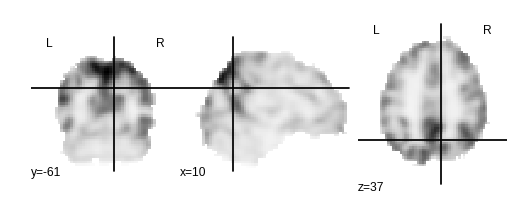

In [12]:
!pip install nilearn
MNI152_FILE_PATH="/content/ABIDE_data/Outputs/cpac/nofilt_noglobal/reho/OHSU_0050148_reho.nii.gz"
from nilearn import plotting
plotting.plot_img(MNI152_FILE_PATH)

In [13]:
!pip install nibabel
import nibabel as nib
img = nib.load(MNI152_FILE_PATH)
a = np.array(img.dataobj)

In [0]:
dirlist=os.listdir("/content/ABIDE_data/Outputs/cpac/nofilt_noglobal/reho/")


In [16]:
a=np.zeros((len(dirlist),a2))
a.shape

(884, 3721)

In [0]:
for x in range(len(dirlist)):
  img = nib.load(os.path.join("/content/ABIDE_data/Outputs/cpac/nofilt_noglobal/reho/", dirlist[x]))
  a1 = np.array(img.dataobj)[:,32,:]
  a[x,] = a1.ravel()

In [18]:
from scipy import stats
stats.describe(a1.ravel())

DescribeResult(nobs=3721, minmax=(0.0, 0.30123770236968994), mean=0.04843139977278716, variance=0.00395184063713764, skewness=1.1291287801224423, kurtosis=0.44424546538537113)

In [0]:
data_tf = tf.convert_to_tensor(a, np.float32)

In [20]:
os.chdir("/content")
!git clone https://github.com/danielcanueto/Adversarial_Autoencoder/
os.chdir("/content/Adversarial_Autoencoder")

Cloning into 'Adversarial_Autoencoder'...
remote: Counting objects: 285, done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 285 (delta 7), reused 3 (delta 0), pack-reused 268
Receiving objects: 100% (285/285), 9.04 MiB | 12.81 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [0]:
#!python3 dummy.py --train True

In [0]:
import tensorflow as tf
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tensorflow.examples.tutorials.mnist import input_data

# Progressbar
# bar = progressbar.ProgressBar(widgets=['[', progressbar.Timer(), ']', progressbar.Bar(), '(', progressbar.ETA(), ')'])

# Get the MNIST data
mnist = data_tf

In [23]:
mnist.shape

TensorShape([Dimension(884), Dimension(3721)])

In [0]:
#mnist = input_data.read_data_sets('./Data', one_hot=True)
#mnist = data_tf
#print(mnist.train.images.shape, mnist.train.labels.shape)
#print(mnist.validation.images.shape, mnist.validation.labels.shape)
#print(mnist.test.images.shape, mnist.test.labels.shape)
#mnist.train.next_batch

In [0]:
def next_batch(self, batch_size, fake_data=False):
    """Return the next `batch_size` examples from this data set."""
    if fake_data:
      fake_image = [1] * 784
      if self.one_hot:
        fake_label = [1] + [0] * 9
      else:
        fake_label = 0
      return [fake_image for _ in xrange(batch_size)], [
          fake_label for _ in xrange(batch_size)
      ]
    start = self._index_in_epoch
    self._index_in_epoch += batch_size
    if self._index_in_epoch > self._num_examples:
      # Finished epoch
      self._epochs_completed += 1
      # Shuffle the data
      perm = numpy.arange(self._num_examples)
      numpy.random.shuffle(perm)
      self._images = self._images[perm]
      self._labels = self._labels[perm]
      # Start next epoch
      start = 0
      self._index_in_epoch = batch_size
      assert batch_size <= self._num_examples
    end = self._index_in_epoch
    return self._images[start:end], self._labels[start:end]


def form_results():
    """
    Forms folders for each run to store the tensorboard files, saved models and the log files.
    :return: three string pointing to tensorboard, saved models and log paths respectively.
    """
    folder_name = "/{0}_{1}_{2}_{3}_{4}_{5}_Adversarial_Autoencoder". \
        format(datetime.datetime.now(), z_dim, learning_rate, batch_size, n_epochs, beta1)
    tensorboard_path = results_path + folder_name + '/Tensorboard'
    saved_model_path = results_path + folder_name + '/Saved_models/'
    log_path = results_path + folder_name + '/log'
    if not os.path.exists(results_path + folder_name):
        os.mkdir(results_path + folder_name)
        os.mkdir(tensorboard_path)
        os.mkdir(saved_model_path)
        os.mkdir(log_path)
    return tensorboard_path, saved_model_path, log_path


def generate_image_grid(sess, op):
    """
    Generates a grid of images by passing a set of numbers to the decoder and getting its output.
    :param sess: Tensorflow Session required to get the decoder output
    :param op: Operation that needs to be called inorder to get the decoder output
    :return: None, displays a matplotlib window with all the merged images.
    """
    x_points = np.arange(-10, 10, 1.5).astype(np.float32)
    y_points = np.arange(-10, 10, 1.5).astype(np.float32)

    nx, ny = len(x_points), len(y_points)
    plt.subplot()
    gs = gridspec.GridSpec(nx, ny, hspace=0.05, wspace=0.05)

    for i, g in enumerate(gs):
        z = np.concatenate(([x_points[int(i / ny)]], [y_points[int(i % nx)]]))
        z = np.reshape(z, (1, 2))
        x = sess.run(op, feed_dict={decoder_input: z})
        ax = plt.subplot(g)
        img = np.array(x.tolist()).reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('auto')
    plt.show()


def dense(x, n1, n2, name):
    """
    Used to create a dense layer.
    :param x: input tensor to the dense layer
    :param n1: no. of input neurons
    :param n2: no. of output neurons
    :param name: name of the entire dense layer.i.e, variable scope name.
    :return: tensor with shape [batch_size, n2]
    """
    with tf.variable_scope(name, reuse=None):
        weights = tf.get_variable("weights", shape=[n1, n2],
                                  initializer=tf.random_normal_initializer(mean=0., stddev=0.01))
        bias = tf.get_variable("bias", shape=[n2], initializer=tf.constant_initializer(0.0))
        out = tf.add(tf.matmul(x, weights), bias, name='matmul')
        return out


# The autoencoder network
def encoder(x, reuse=False):
    """
    Encode part of the autoencoder.
    :param x: input to the autoencoder
    :param reuse: True -> Reuse the encoder variables, False -> Create or search of variables before creating
    :return: tensor which is the hidden latent variable of the autoencoder.
    """
    if reuse:
        tf.get_variable_scope().reuse_variables()
    with tf.name_scope('Encoder'):
        e_dense_1 = tf.nn.relu(dense(x, input_dim, n_l1, 'e_dense_1'))
        e_dense_2 = tf.nn.relu(dense(e_dense_1, n_l1, n_l2, 'e_dense_2'))
        latent_variable = dense(e_dense_2, n_l2, z_dim, 'e_latent_variable')
        return latent_variable


def decoder(x, reuse=False):
    """
    Decoder part of the autoencoder.
    :param x: input to the decoder
    :param reuse: True -> Reuse the decoder variables, False -> Create or search of variables before creating
    :return: tensor which should ideally be the input given to the encoder.
    """
    if reuse:
        tf.get_variable_scope().reuse_variables()
    with tf.name_scope('Decoder'):
        d_dense_1 = tf.nn.relu(dense(x, z_dim, n_l2, 'd_dense_1'))
        d_dense_2 = tf.nn.relu(dense(d_dense_1, n_l2, n_l1, 'd_dense_2'))
        output = tf.nn.sigmoid(dense(d_dense_2, n_l1, input_dim, 'd_output'))
        return output


def discriminator(x, reuse=False):
    """
    Discriminator that is used to match the posterior distribution with a given prior distribution.
    :param x: tensor of shape [batch_size, z_dim]
    :param reuse: True -> Reuse the discriminator variables,
                  False -> Create or search of variables before creating
    :return: tensor of shape [batch_size, 1]
    """
    if reuse:
        tf.get_variable_scope().reuse_variables()
    with tf.name_scope('Discriminator'):
        dc_den1 = tf.nn.relu(dense(x, z_dim, n_l1, name='dc_den1'))
        dc_den2 = tf.nn.relu(dense(dc_den1, n_l1, n_l2, name='dc_den2'))
        output = dense(dc_den2, n_l2, 1, name='dc_output')
        return output


def train(train_model=True):
    """
    Used to train the autoencoder by passing in the necessary inputs.
    :param train_model: True -> Train the model, False -> Load the latest trained model and show the image grid.
    :return: does not return anything
    """
    with tf.variable_scope(tf.get_variable_scope()):
        encoder_output = encoder(x_input)
        decoder_output = decoder(encoder_output)

    with tf.variable_scope(tf.get_variable_scope()):
        d_real = discriminator(real_distribution)
        d_fake = discriminator(encoder_output, reuse=True)

    with tf.variable_scope(tf.get_variable_scope()):
        decoder_image = decoder(decoder_input, reuse=True)

    # Autoencoder loss
    autoencoder_loss = tf.reduce_mean(tf.square(x_target - decoder_output))

    # Discrimminator Loss
    dc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_real), logits=d_real))
    dc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_fake), logits=d_fake))
    dc_loss = dc_loss_fake + dc_loss_real

    # Generator loss
    generator_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_fake), logits=d_fake))

    all_variables = tf.trainable_variables()
    dc_var = [var for var in all_variables if 'dc_' in var.name]
    en_var = [var for var in all_variables if 'e_' in var.name]

    # Optimizers
    autoencoder_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                                   beta1=beta1).minimize(autoencoder_loss)
    discriminator_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                                     beta1=beta1).minimize(dc_loss, var_list=dc_var)
    generator_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                                 beta1=beta1).minimize(generator_loss, var_list=en_var)

    init = tf.global_variables_initializer()

    # Reshape immages to display them
    input_images = tf.reshape(x_input, [-1, 28, 28, 1])
    generated_images = tf.reshape(decoder_output, [-1, 28, 28, 1])

    # Tensorboard visualization
    tf.summary.scalar(name='Autoencoder Loss', tensor=autoencoder_loss)
    tf.summary.scalar(name='Discriminator Loss', tensor=dc_loss)
    tf.summary.scalar(name='Generator Loss', tensor=generator_loss)
    tf.summary.histogram(name='Encoder Distribution', values=encoder_output)
    tf.summary.histogram(name='Real Distribution', values=real_distribution)
    tf.summary.image(name='Input Images', tensor=input_images, max_outputs=10)
    tf.summary.image(name='Generated Images', tensor=generated_images, max_outputs=10)
    summary_op = tf.summary.merge_all()

    # Saving the model
    saver = tf.train.Saver()
    step = 0
    with tf.Session() as sess:
        if train_model:
            tensorboard_path, saved_model_path, log_path = form_results()
            sess.run(init)
            writer = tf.summary.FileWriter(logdir=tensorboard_path, graph=sess.graph)
            for i in range(n_epochs):
                n_batches = int(X_train.shape[0] / batch_size)
                print("------------------Epoch {}/{}------------------".format(i, n_epochs))
                for b in range(1, n_batches + 1):
                    z_real_dist = np.random.randn(batch_size, z_dim) * 5.
                    batch_x, _ = x_input.next_batch(batch_size)
                    sess.run(autoencoder_optimizer, feed_dict={x_input: batch_x, x_target: batch_x})
                    sess.run(discriminator_optimizer,
                             feed_dict={x_input: batch_x, x_target: batch_x, real_distribution: z_real_dist})
                    sess.run(generator_optimizer, feed_dict={x_input: batch_x, x_target: batch_x})
                    if b % 50 == 0:
                        a_loss, d_loss, g_loss, summary = sess.run(
                            [autoencoder_loss, dc_loss, generator_loss, summary_op],
                            feed_dict={x_input: batch_x, x_target: batch_x,
                                       real_distribution: z_real_dist})
                        writer.add_summary(summary, global_step=step)
                        print("Epoch: {}, iteration: {}".format(i, b))
                        print("Autoencoder Loss: {}".format(a_loss))
                        print("Discriminator Loss: {}".format(d_loss))
                        print("Generator Loss: {}".format(g_loss))
                        with open(log_path + '/log.txt', 'a') as log:
                            log.write("Epoch: {}, iteration: {}\n".format(i, b))
                            log.write("Autoencoder Loss: {}\n".format(a_loss))
                            log.write("Discriminator Loss: {}\n".format(d_loss))
                            log.write("Generator Loss: {}\n".format(g_loss))
                    step += 1

                saver.save(sess, save_path=saved_model_path, global_step=step)
        else:
            # Get the latest results folder
            all_results = os.listdir(results_path)
            all_results.sort()
            saver.restore(sess, save_path=tf.train.latest_checkpoint(results_path + '/' + all_results[-1] + '/Saved_models/'))
            generate_image_grid(sess, op=decoder_image)

In [26]:
from sklearn.cross_validation import train_test_split

X_train, X_test= train_test_split(a,test_size=0.2, random_state=1)

x_input, X_val= train_test_split(X_train, test_size=0.2, random_state=1)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
# Parameters
input_dim = a.shape[1]
n_l1 = 100
n_l2 = 100
z_dim = 2
batch_size = 100
n_epochs = 100
learning_rate = 0.001
beta1 = 0.9
results_path = './Results/Adversarial_Autoencoder'

# Placeholders for input data and the targets
x_input = tf.placeholder(dtype=tf.float32, shape=[batch_size, input_dim], name='Input')
x_target = tf.placeholder(dtype=tf.float32, shape=[batch_size, input_dim], name='Target')
real_distribution = tf.placeholder(dtype=tf.float32, shape=[batch_size, z_dim], name='Real_distribution')
decoder_input = tf.placeholder(dtype=tf.float32, shape=[1, z_dim], name='Decoder_input')

In [31]:
tf.reset_default_graph() 
train(train_model=True)

ValueError: ignored

In [32]:
!python3 adversarial_autoencoder.py --train True

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./Data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./Data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully d

In [33]:
import tensorflow as tf
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tensorflow.examples.tutorials.mnist import input_data

# Progressbar
# bar = progressbar.ProgressBar(widgets=['[', progressbar.Timer(), ']', progressbar.Bar(), '(', progressbar.ETA(), ')'])

# Get the MNIST data
mnist = input_data.read_data_sets('./Data', one_hot=True)

# Parameters
input_dim = 784
n_l1 = 1000
n_l2 = 1000
z_dim = 2
batch_size = 100
n_epochs = 100
learning_rate = 0.001
beta1 = 0.9
results_path = './Results/Adversarial_Autoencoder'

# Placeholders for input data and the targets
x_input = tf.placeholder(dtype=tf.float32, shape=[batch_size, input_dim], name='Input')
x_target = tf.placeholder(dtype=tf.float32, shape=[batch_size, input_dim], name='Target')
real_distribution = tf.placeholder(dtype=tf.float32, shape=[batch_size, z_dim], name='Real_distribution')
decoder_input = tf.placeholder(dtype=tf.float32, shape=[1, z_dim], name='Decoder_input')


def form_results():
    """
    Forms folders for each run to store the tensorboard files, saved models and the log files.
    :return: three string pointing to tensorboard, saved models and log paths respectively.
    """
    folder_name = "/{0}_{1}_{2}_{3}_{4}_{5}_Adversarial_Autoencoder". \
        format(datetime.datetime.now(), z_dim, learning_rate, batch_size, n_epochs, beta1)
    tensorboard_path = results_path + folder_name + '/Tensorboard'
    saved_model_path = results_path + folder_name + '/Saved_models/'
    log_path = results_path + folder_name + '/log'
    if not os.path.exists(results_path + folder_name):
        os.mkdir(results_path + folder_name)
        os.mkdir(tensorboard_path)
        os.mkdir(saved_model_path)
        os.mkdir(log_path)
    return tensorboard_path, saved_model_path, log_path


def generate_image_grid(sess, op):
    """
    Generates a grid of images by passing a set of numbers to the decoder and getting its output.
    :param sess: Tensorflow Session required to get the decoder output
    :param op: Operation that needs to be called inorder to get the decoder output
    :return: None, displays a matplotlib window with all the merged images.
    """
    x_points = np.arange(-10, 10, 1.5).astype(np.float32)
    y_points = np.arange(-10, 10, 1.5).astype(np.float32)

    nx, ny = len(x_points), len(y_points)
    plt.subplot()
    gs = gridspec.GridSpec(nx, ny, hspace=0.05, wspace=0.05)

    for i, g in enumerate(gs):
        z = np.concatenate(([x_points[int(i / ny)]], [y_points[int(i % nx)]]))
        z = np.reshape(z, (1, 2))
        x = sess.run(op, feed_dict={decoder_input: z})
        ax = plt.subplot(g)
        img = np.array(x.tolist()).reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('auto')
    plt.show()


def dense(x, n1, n2, name):
    """
    Used to create a dense layer.
    :param x: input tensor to the dense layer
    :param n1: no. of input neurons
    :param n2: no. of output neurons
    :param name: name of the entire dense layer.i.e, variable scope name.
    :return: tensor with shape [batch_size, n2]
    """
    with tf.variable_scope(name, reuse=None):
        weights = tf.get_variable("weights", shape=[n1, n2],
                                  initializer=tf.random_normal_initializer(mean=0., stddev=0.01))
        bias = tf.get_variable("bias", shape=[n2], initializer=tf.constant_initializer(0.0))
        out = tf.add(tf.matmul(x, weights), bias, name='matmul')
        return out


# The autoencoder network
def encoder(x, reuse=False):
    """
    Encode part of the autoencoder.
    :param x: input to the autoencoder
    :param reuse: True -> Reuse the encoder variables, False -> Create or search of variables before creating
    :return: tensor which is the hidden latent variable of the autoencoder.
    """
    if reuse:
        tf.get_variable_scope().reuse_variables()
    with tf.name_scope('Encoder'):
        e_dense_1 = tf.nn.relu(dense(x, input_dim, n_l1, 'e_dense_1'))
        e_dense_2 = tf.nn.relu(dense(e_dense_1, n_l1, n_l2, 'e_dense_2'))
        latent_variable = dense(e_dense_2, n_l2, z_dim, 'e_latent_variable')
        return latent_variable


def decoder(x, reuse=False):
    """
    Decoder part of the autoencoder.
    :param x: input to the decoder
    :param reuse: True -> Reuse the decoder variables, False -> Create or search of variables before creating
    :return: tensor which should ideally be the input given to the encoder.
    """
    if reuse:
        tf.get_variable_scope().reuse_variables()
    with tf.name_scope('Decoder'):
        d_dense_1 = tf.nn.relu(dense(x, z_dim, n_l2, 'd_dense_1'))
        d_dense_2 = tf.nn.relu(dense(d_dense_1, n_l2, n_l1, 'd_dense_2'))
        output = tf.nn.sigmoid(dense(d_dense_2, n_l1, input_dim, 'd_output'))
        return output


def discriminator(x, reuse=False):
    """
    Discriminator that is used to match the posterior distribution with a given prior distribution.
    :param x: tensor of shape [batch_size, z_dim]
    :param reuse: True -> Reuse the discriminator variables,
                  False -> Create or search of variables before creating
    :return: tensor of shape [batch_size, 1]
    """
    if reuse:
        tf.get_variable_scope().reuse_variables()
    with tf.name_scope('Discriminator'):
        dc_den1 = tf.nn.relu(dense(x, z_dim, n_l1, name='dc_den1'))
        dc_den2 = tf.nn.relu(dense(dc_den1, n_l1, n_l2, name='dc_den2'))
        output = dense(dc_den2, n_l2, 1, name='dc_output')
        return output


def train(train_model=True):
    """
    Used to train the autoencoder by passing in the necessary inputs.
    :param train_model: True -> Train the model, False -> Load the latest trained model and show the image grid.
    :return: does not return anything
    """
    with tf.variable_scope(tf.get_variable_scope()):
        encoder_output = encoder(x_input)
        decoder_output = decoder(encoder_output)

    with tf.variable_scope(tf.get_variable_scope()):
        d_real = discriminator(real_distribution)
        d_fake = discriminator(encoder_output, reuse=True)

    with tf.variable_scope(tf.get_variable_scope()):
        decoder_image = decoder(decoder_input, reuse=True)

    # Autoencoder loss
    autoencoder_loss = tf.reduce_mean(tf.square(x_target - decoder_output))

    # Discrimminator Loss
    dc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_real), logits=d_real))
    dc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_fake), logits=d_fake))
    dc_loss = dc_loss_fake + dc_loss_real

    # Generator loss
    generator_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_fake), logits=d_fake))

    all_variables = tf.trainable_variables()
    dc_var = [var for var in all_variables if 'dc_' in var.name]
    en_var = [var for var in all_variables if 'e_' in var.name]

    # Optimizers
    autoencoder_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                                   beta1=beta1).minimize(autoencoder_loss)
    discriminator_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                                     beta1=beta1).minimize(dc_loss, var_list=dc_var)
    generator_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                                 beta1=beta1).minimize(generator_loss, var_list=en_var)

    init = tf.global_variables_initializer()

    # Reshape immages to display them
    input_images = tf.reshape(x_input, [-1, 28, 28, 1])
    generated_images = tf.reshape(decoder_output, [-1, 28, 28, 1])

    # Tensorboard visualization
    tf.summary.scalar(name='Autoencoder Loss', tensor=autoencoder_loss)
    tf.summary.scalar(name='Discriminator Loss', tensor=dc_loss)
    tf.summary.scalar(name='Generator Loss', tensor=generator_loss)
    tf.summary.histogram(name='Encoder Distribution', values=encoder_output)
    tf.summary.histogram(name='Real Distribution', values=real_distribution)
    tf.summary.image(name='Input Images', tensor=input_images, max_outputs=10)
    tf.summary.image(name='Generated Images', tensor=generated_images, max_outputs=10)
    summary_op = tf.summary.merge_all()

    # Saving the model
    saver = tf.train.Saver()
    step = 0
    with tf.Session() as sess:
        if train_model:
            tensorboard_path, saved_model_path, log_path = form_results()
            sess.run(init)
            writer = tf.summary.FileWriter(logdir=tensorboard_path, graph=sess.graph)
            for i in range(n_epochs):
                n_batches = int(mnist.train.num_examples / batch_size)
                print("------------------Epoch {}/{}------------------".format(i, n_epochs))
                for b in range(1, n_batches + 1):
                    z_real_dist = np.random.randn(batch_size, z_dim) * 5.
                    batch_x, _ = mnist.train.next_batch(batch_size)
                    sess.run(autoencoder_optimizer, feed_dict={x_input: batch_x, x_target: batch_x})
                    sess.run(discriminator_optimizer,
                             feed_dict={x_input: batch_x, x_target: batch_x, real_distribution: z_real_dist})
                    sess.run(generator_optimizer, feed_dict={x_input: batch_x, x_target: batch_x})
                    if b % 50 == 0:
                        a_loss, d_loss, g_loss, summary = sess.run(
                            [autoencoder_loss, dc_loss, generator_loss, summary_op],
                            feed_dict={x_input: batch_x, x_target: batch_x,
                                       real_distribution: z_real_dist})
                        writer.add_summary(summary, global_step=step)
                        print("Epoch: {}, iteration: {}".format(i, b))
                        print("Autoencoder Loss: {}".format(a_loss))
                        print("Discriminator Loss: {}".format(d_loss))
                        print("Generator Loss: {}".format(g_loss))
                        with open(log_path + '/log.txt', 'a') as log:
                            log.write("Epoch: {}, iteration: {}\n".format(i, b))
                            log.write("Autoencoder Loss: {}\n".format(a_loss))
                            log.write("Discriminator Loss: {}\n".format(d_loss))
                            log.write("Generator Loss: {}\n".format(g_loss))
                    step += 1

                saver.save(sess, save_path=saved_model_path, global_step=step)
        else:
            # Get the latest results folder
            all_results = os.listdir(results_path)
            all_results.sort()
            saver.restore(sess, save_path=tf.train.latest_checkpoint(results_path + '/' + all_results[-1] + '/Saved_models/'))
            generate_image_grid(sess, op=decoder_image)

if __name__ == '__main__':
    train(train_model=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./Data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./Data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./Data/t10k-images-idx3-ubyte.gz
Extracting ./Data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


ValueError: ignored